<h1 align="center"><font color='blue'>Data Science Project - EduPhile</font></h1>

***Made By***  <br> 1. Jumshaid Khan (FA17-BSE-004) <br> 2. Syeda Shane Zahra (FA17-BSE-043) <br><br> ***Scenario 01:*** Predicting the Grade of a student on the basis of answer. (Supervised Learning Approach)


-----------------------------------------------------------------------------------------------------

### Analyzing  Data

In [47]:
#Libraries
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib as matplotlib
import matplotlib.lines as mlines

In [2]:
url = "assign01-q01.csv"
dataset = read_csv(url)
dataset.head(5)

,student_answer,total_score,teacher_score,percentage,grade
0,high risk problems are address in the prototyp...,5,3.5,70,C
1,to simulate portions of the desired final prod...,5,5.0,100,A
2,a prototype program simulates the behaviors of...,5,4.0,80,B
3,defined in the specification phase a prototype...,5,5.0,100,A
4,it is used to let the users have a first idea ...,5,3.0,60,D


In [3]:
print("Number of data points: ",dataset.size)
print(dataset.groupby('grade').size())

Number of data points:  145
grade
A    12
B     1
C     2
D     3
F    11
dtype: int64


### Preprocessing Data

##### Tokenization of answers

In [4]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jumsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jumsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
print("Original Student Answer:", dataset["student_answer"][0],"\n\n")
print("Tokenized Answer:",tokenizer.tokenize(dataset["student_answer"][0])) 

Original Student Answer: high risk problems are address in the prototype program to make sure that the program is feasible.  a prototype may also be used to show a company that the software can be possibly programmed. 


Tokenized Answer: ['high', 'risk', 'problems', 'are', 'address', 'in', 'the', 'prototype', 'program', 'to', 'make', 'sure', 'that', 'the', 'program', 'is', 'feasible', 'a', 'prototype', 'may', 'also', 'be', 'used', 'to', 'show', 'a', 'company', 'that', 'the', 'software', 'can', 'be', 'possibly', 'programmed']


In [6]:
tk_std_ans = [] 
for sentence in dataset["student_answer"].values:
    tk_std_ans.append(tokenizer.tokenize(sentence))

##### Stopwords Removal

In [7]:
from nltk.corpus import stopwords

filtered_words = [word for word in tk_std_ans[0] if word not in stopwords.words('English')] 
print("Original Tokenized Answer: ", tk_std_ans[0])
print()
print("Tokenized Answer after stopwords removal: ", filtered_words)

list_fw_std_ans = []

for sentence in tk_std_ans:
    fw_list = [word for word in sentence if word not in stopwords.words('English')]
    list_fw_std_ans.append(fw_list)

Original Tokenized Answer:  ['high', 'risk', 'problems', 'are', 'address', 'in', 'the', 'prototype', 'program', 'to', 'make', 'sure', 'that', 'the', 'program', 'is', 'feasible', 'a', 'prototype', 'may', 'also', 'be', 'used', 'to', 'show', 'a', 'company', 'that', 'the', 'software', 'can', 'be', 'possibly', 'programmed']

Tokenized Answer after stopwords removal:  ['high', 'risk', 'problems', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', 'prototype', 'may', 'also', 'used', 'show', 'company', 'software', 'possibly', 'programmed']


##### Lemmatization

In [8]:
print("Orignal Student Answer: ", list_fw_std_ans[0])

lem_ans = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in list_fw_std_ans[0]]
print()
print("Lemmatized words: ", lem_ans)

list_lem_std_ans = []

for sentence in list_fw_std_ans:
    lm_list = [word for word in sentence if word not in stopwords.words('English')]
    list_lem_std_ans.append(lm_list)

Orignal Student Answer:  ['high', 'risk', 'problems', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', 'prototype', 'may', 'also', 'used', 'show', 'company', 'software', 'possibly', 'programmed']

Lemmatized words:  ['high', 'risk', 'problem', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', 'prototype', 'may', 'also', 'used', 'show', 'company', 'software', 'possibly', 'programmed']


##### Stemming

In [9]:
print("Original Student Answer: ", list_lem_std_ans[0],"\n\n")

stemmed_words = [nltk.stem.PorterStemmer().stem(word) for word in list_lem_std_ans[0]]
print("Stemmed Student Answer using Porter Stemmer: ", stemmed_words)

list_stem_std_ans = []

for sentence in list_lem_std_ans:
    stem_list = [nltk.stem.PorterStemmer().stem(word) for word in sentence]
    list_stem_std_ans.append(stem_list)

Original Student Answer:  ['high', 'risk', 'problems', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', 'prototype', 'may', 'also', 'used', 'show', 'company', 'software', 'possibly', 'programmed'] 


Stemmed Student Answer using Porter Stemmer:  ['high', 'risk', 'problem', 'address', 'prototyp', 'program', 'make', 'sure', 'program', 'feasibl', 'prototyp', 'may', 'also', 'use', 'show', 'compani', 'softwar', 'possibl', 'program']


In [10]:
# creating our lemmitized student answers into series  
data_std_ans = pd.Series(list_stem_std_ans) 
print(data_std_ans) 

0     [high, risk, problem, address, prototyp, progr...
1     [simul, portion, desir, final, product, quick,...
2     [prototyp, program, simul, behavior, portion, ...
3     [defin, specif, phase, prototyp, stimul, behav...
4     [use, let, user, first, idea, complet, program...
5                [find, problem, error, program, final]
6     [address, major, issu, creation, program, way,...
7     [break, whole, program, prototyp, program, sim...
8     [provid, exampl, model, finish, program, perfo...
9     [simul, behavior, portion, desir, softwar, pro...
10    [program, stimul, behavior, portion, desir, so...
11    [program, simul, behavior, portion, desir, sof...
12    [lay, basic, give, start, point, actual, probl...
13                [simul, problem, solv, part, problem]
14    [prototyp, program, provid, basic, groundwork,...
15    [prototyp, program, part, specif, phase, softw...
16    [program, simul, behavior, portion, desir, sof...
17    [provid, limit, proof, concept, verifi, cl

### Creating Feature Vectors

In [11]:
# preparing teacher answer
t_quest = "What is the role of a prototype program in problem solving?"
t_ans = "To simulate the behaviour of portions of the desired software product."
t_tkn_ans = tokenizer.tokenize(t_ans)
t_fw_ans = [word for word in t_tkn_ans if word not in stopwords.words('English')]
t_lem_ans = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in t_fw_ans]

print("Original Teacher Answer:", t_ans,"\n\n")
print("Tokenized + Stopwords Removed + Lemmatized Teacher Answer:", t_lem_ans) 

Original Teacher Answer: To simulate the behaviour of portions of the desired software product. 


Tokenized + Stopwords Removed + Lemmatized Teacher Answer: ['To', 'simulate', 'behaviour', 'portion', 'desired', 'software', 'product']


##### Bag of words

In [12]:
def dummy(doc):
    return doc

from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=200, tokenizer=dummy, preprocessor=dummy,)
X_features = matrix.fit(data_std_ans)
X = matrix.fit_transform(data_std_ans).toarray() 

print("Total number of features extracted from all answers(BOW): ",len(X_features.get_feature_names()))
print("Total number of students answers: ",len(X))


Total number of features extracted from all answers(BOW):  159
Total number of students answers:  29


##### Creating Training and testing data

In [13]:
# X is the input data
y = dataset.iloc[:, 4] # input labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6)

### ML Models for Classification

##### Using Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluation Metrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

accuracy_N = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),"\n")

print("The accuracy score for Naive Bayes: ",accuracy_N*100)
f1_score_N = f1_score(y_test, y_pred, average = 'weighted')
print("F1 Score: ", f1_score_N)

Confusion Matrix:
 [[5 0 0 0 5]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 2]
 [0 0 0 0 4]] 

The accuracy score for Naive Bayes:  50.0
F1 Score:  0.4583333333333333


C:\Users\jumsh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Using KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

# Evaluation Metrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),"\n")
f1_score_K = f1_score(y_test, y_pred, average = 'weighted')
print("The accuracy score for Naive Bayes: ",accuracy*100)
print("F1 Score: ", f1_score_K)

Confusion Matrix:
 [[9 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [2 0 0 0 0]
 [0 0 0 0 4]] 

The accuracy score for Naive Bayes:  72.22222222222221
F1 Score:  0.6323232323232324


C:\Users\jumsh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Visualizing Accuracy Results

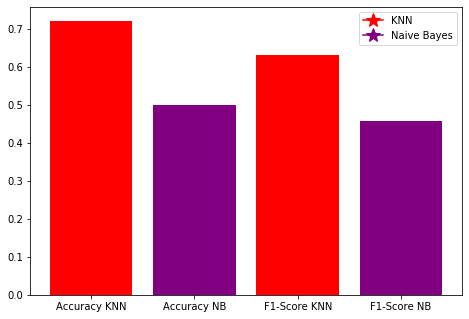

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Accuracy KNN', 'Accuracy NB','F1-Score KNN','F1-Score NB']
values = [accuracy, accuracy_N, f1_score_K, f1_score_N]
plt.bar(langs,values,color=['red', 'purple', 'red', 'purple'])

red_line = mlines.Line2D([], [], color='red', marker='*',
                          markersize=15, label='KNN')
pur_line = mlines.Line2D([], [], color='purple', marker='*',
                          markersize=15, label='Naive Bayes')
plt.legend(handles=[red_line,pur_line])

plt.show()